In [1]:
import random
import math

def uniform_range(minimum: float,
                  maximum: float) -> float:
    """
    Generation of a pseudo-casual number distributed accordingly to uniform distribution between
    [minimum, maximum)

    Args:
        minimum: lower limit of the range (included)
        maximum: upper limit of the range (excluded)

    Returns:
        A pseudo-casual numbers generated according to uniform distribution between [minimum, maximum)
    """

    return minimum + (random.random() * (maximum - minimum))


def func(x, G, M):
    return (1/math.pi)*(G/((x-M)**2 + G**2))

def tac_cauchy(G: float,
               M: float,
               half_width: float,
               seed: float = 0.) -> float:
    """
    Generation of a pseudo-casual number distributed accordingly to the Cauchy distribution
    with the try-an-catch algorithm, into a "box" delimited by x_minimum and x_maximum for the
    horizontal axis and y_minimum and y_maximum for the vertical axis starting from an optional seed
    different from 0.

    Args:
        G: parameter of the function
        M: parameter of the function
        half_width: half width of the interval over the horizontal axis
        seed: starting seed for the random generation (optional)

    Returns:
        A single number generated with the try-an-catch algorithm
    """
    
    if seed != 0.:
        random.seed(seed)
    x = uniform_range(M - half_width, M + half_width)
    y = uniform_range(0, 1/(math.pi*G))

    while y > func(x, G, M):
        x = uniform_range(M - half_width, M + half_width)
        y = uniform_range(0, 1/(math.pi*G))
    return x

In [2]:
N = 10000
data = []

gamma = 5
M = 3

for i in range(N):
    data.append(tac_cauchy(gamma, M, 3*gamma))

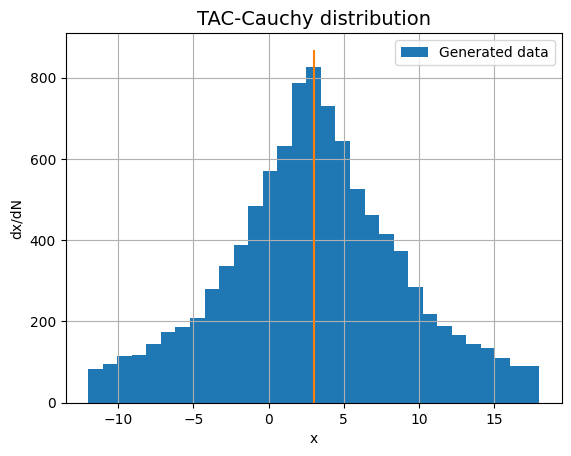

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def sturges(sample: list[float]) -> int:
    """
    Calculation of the optimal number of bins to plot a histogram using the sturges rule

    Args:
        sample: list of floats representing data

    Returns:
        The number of bins according to sturges rule
    """

    return int(math.ceil(1 + 3.322 * math.log(len(sample))))

bin_content, bin_edges = np.histogram(data, bins=np.linspace(math.floor(min(data)), math.ceil(max(data)), sturges(data)))

fig, ax = plt.subplots(1, 1)
ax.hist(data, bins=bin_edges, label="Generated data")
plt.plot([M, M], ax.get_ylim())
ax.set_title("TAC-Cauchy distribution", size=14)
ax.set_xlabel("x")
ax.set_ylabel("dx/dN")
ax.grid(True)
ax.legend()
plt.show()

In [4]:
def mean(sample: list[float]) -> float:
    """
    Calculation of the mean of the sample present in the object

    Args:
        sample: list of floats representing data

    Returns:
        The mean of the sample
    """

    summ = sum(sample)
    n = len(sample)
    return summ / n

def variance(sample: list[float],
             bessel: bool = True) -> float:
    """
    Calculation of the variance of the sample present in the object

    Args:
        sample: list of floats representing data
        bessel: applies the bessel correction (optional, default: True)

    Returns:
        The variance of the sample
    """

    summ = 0.
    sum_sq = 0.
    n = len(sample)
    for elem in sample:
        summ += elem
        sum_sq += elem * elem
    var = sum_sq / n - summ * summ / (n * n)
    if bessel:
        var = n * var / (n - 1)
    return var

def stddev(sample: list[float],
           bessel: bool = True) -> float:
    """
    Calculation of the standard deviation of the sample present in the object

    Args:
        sample: list of floats representing data
        bessel: applies the bessel correction (optional, default: True)

    Returns:
        The standard deviation of the sample
    """

    return math.sqrt(variance(sample, bessel))

In [5]:
means = []
variances = []

for i in range(100):
    set_data = []
    for j in range(N):
        set_data.append(tac_cauchy(gamma, M, (i+1)*gamma))
    means.append(mean(set_data))
    variances.append(stddev(set_data))
    
print(means, variances)

[3.0396507142688765, 3.0092460127270644, 2.9742195515274075, 3.1441614153125603, 3.0320600234839636, 3.006643528129997, 2.872521648077379, 2.899081907039108, 3.003559685694912, 3.0074583218974373, 3.2043818428701596, 2.8813927494388736, 2.9102163606239535, 3.049415296194752, 2.9717239860669444, 2.8891797184025627, 3.2379489743764838, 3.1485513984211564, 2.984206542178195, 2.92449021743393, 3.0696543402638494, 2.698925515907549, 3.148819292941032, 3.2213126223582735, 2.9525813213889234, 2.772219393435811, 3.0596077253513814, 2.9850910136319007, 2.9607798448320306, 2.96286428116385, 3.231559383948999, 2.9472863394495503, 2.931611613789551, 2.4611248478391983, 3.178321182005338, 2.6542881310552926, 3.438891082859325, 2.8751815875487425, 2.565267025587138, 2.6471442985373064, 2.8103781339327942, 2.7291607294161735, 3.314725083817255, 2.980916316961246, 2.967410468114944, 3.0625536468072534, 2.8339430806197035, 2.881203178258506, 3.5410776638276875, 3.2280761033059244, 3.1379901908641474, 3

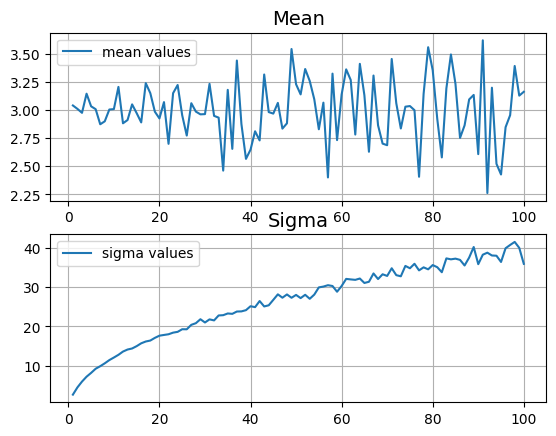

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=1)
ax[0].errorbar(np.linspace(1, 100, 100), means, label="mean values")
ax[0].set_title("Mean", size=14)
ax[1].errorbar(np.linspace(1, 100, 100), variances, label="sigma values")
ax[1].set_title("Sigma", size=14)
ax[0].grid(True)
ax[1].grid(True)
ax[0].legend()
ax[1].legend()
plt.show()

In [7]:
def clt_ms_cauchy(G: float,
                  M: float,
                  half_width: float,
                  n_sum: int = 10) -> float:
    

    y = 0.
    for i in range(n_sum):
        y += tac_cauchy(G, M, half_width)
    y /= n_sum
    return y


In [10]:
import scipy as sp

clt = []
for t in range(10000):
    clt.append(clt_ms_cauchy(gamma, M, 3*gamma))

print(np.mean(clt))
print(np.std(clt))
print(sp.stats.skew(clt))
print(sp.stats.kurtosis(clt))

2.9850832049402607
1.876349798143961
-0.013839731017168521
-0.013650795457602172


In [11]:
from iminuit import Minuit
from iminuit.cost import UnbinnedNLL

def pdf(x, mu, sigma):
    return sp.stats.norm.pdf(x, mu, sigma)

cost_func = UnbinnedNLL(clt, pdf)
my_minuit = Minuit(cost_func, mu=np.mean(clt), sigma=np.std(clt))
my_minuit.limits['sigma'] = (0, None)

my_minuit.migrad()
my_minuit.minos()
display(my_minuit)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 4.097e+04                  │              Nfcn = 59               │
│ EDM = 7.56e-15 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬───────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name  │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼───────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ mu    │   2.985   │   0.019   │   -0.019   │   0.019    │         │         │       │
│ 1 │ sigma │   1.876   │   0.013   │   -0.013   │   0.013    │    0    │         │       │
└───┴───────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │          mu           │         sigma         │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │  -0.019   │   0.019   │  -0.013   │   0.013   │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───────┬───────────────────┐
│       │       mu    sigma │
├───────┼───────────────────┤
│    mu │ 0.000352        0 │
│ sigma │        0 0.000176 │
└───────┴───────────────────┘